<a href="https://colab.research.google.com/github/davidogm/NM/blob/main/Ejemplo_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de visualización de cuadros de mando 

## Cargamos los datos en formato

In [27]:
import pandas as pd
df = pd.read_csv ('aapl.csv')

In [28]:
# mostramos los primeros datos
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575914
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643498
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783868
3,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917510
4,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897019


In [46]:
# dimensiones de los datos
df.shape

(2588, 7)

In [30]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [31]:
# Conversión objeto a fecha
from datetime import datetime
Date = pd.to_datetime(df['Date'])

## Cuadros de mando con matplot

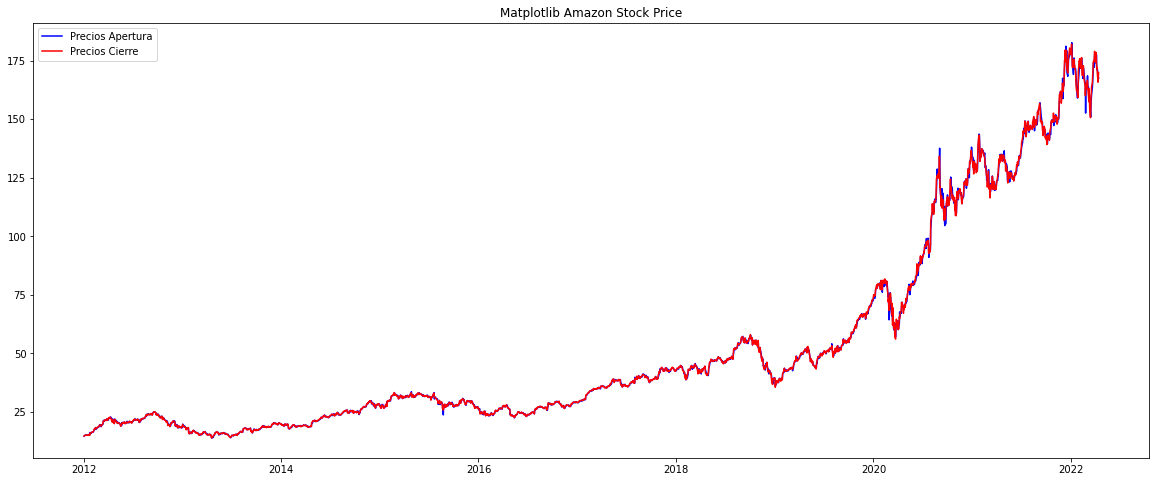

In [32]:
# usamos la librería matplot para mostrar los datos 
import matplotlib.pyplot as plt

x= Date

plt.figure(figsize=(20,8))
plt.title('Matplotlib Amazon Stock Price')

plt.plot(x, df['Open'], 'b', label='Precios Apertura')
plt.plot(x, df['Close'], 'r', label='Precios Cierre')

plt.legend()


plt.show()

O más simple, sólo mostrando los precios de cierre

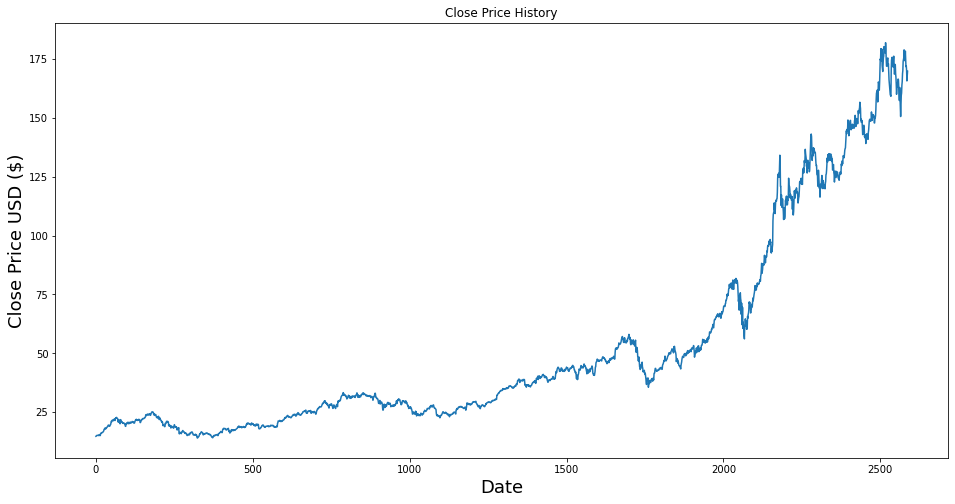

In [33]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Podemos incluir la librería seaborn para que salgan los gráficos más detallados

In [34]:
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

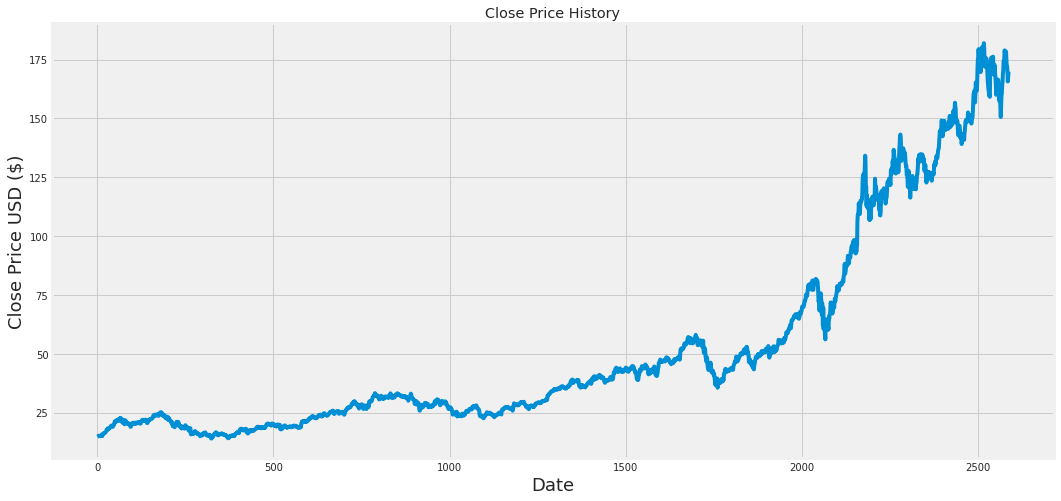

In [35]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

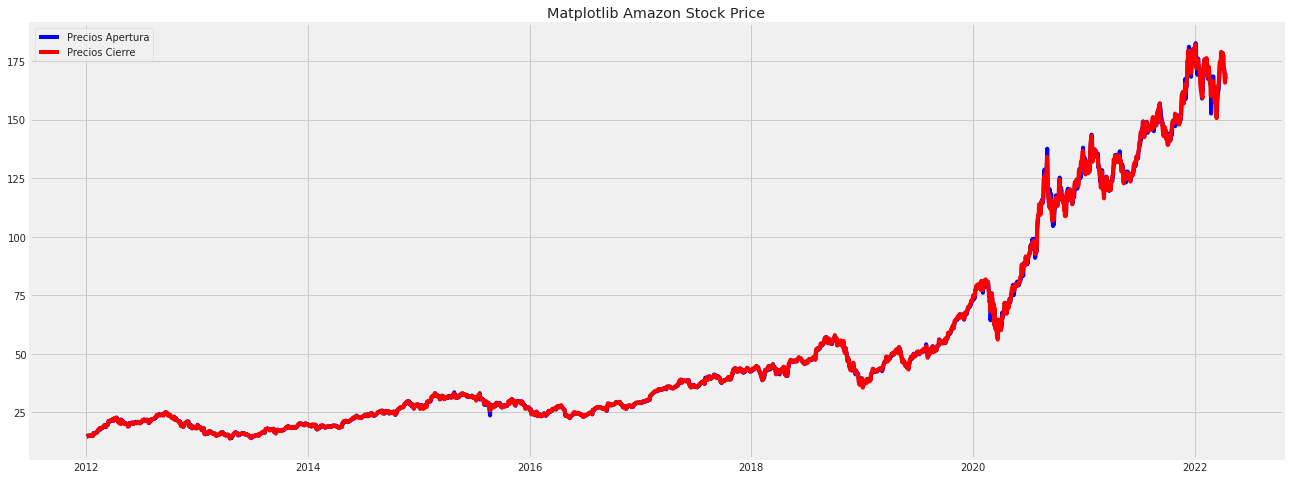

In [36]:
plt.figure(figsize=(20,8))
plt.title('Matplotlib Amazon Stock Price')

plt.plot(x, df['Open'], 'b', label='Precios Apertura')
plt.plot(x, df['Close'], 'r', label='Precios Cierre')

plt.legend()


plt.show()

## Transformaciones de los datos 

Preprocesamiento para preparar la entrada en nuestros modelos de redes neuronales

In [47]:
df.shape

(2588, 7)

In [50]:
import numpy as np


# Creamos un nuevo dataframe usando únicamente la columna 'Close' 
data = df.filter(['Close'])

# Convertimos el dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2459

In [48]:
data.shape

(2588, 1)

In [38]:
# recordad la importancia de escalar/normalizar los datos, siempre pero más aún con ANN
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.90325031],
       [0.91461515],
       [0.92776497]])

In [ ]:
# Se crea el conjunto de datos de entrenamiento escalado
train_data = scaled_data[0:int(training_data_len), :]
# Se dividen los datos en conjuntos de datos x_train e y_train
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 101:
        print(x_train)
        print(y_train)
        print()
        
# Se convierte en numpy arrays para el tratamiento correcto en ANN
x_train, y_train = np.array(x_train), np.array(y_train)

# Ajustamos los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [40]:
# revisemos las dimensiones de los conjuntos de datos
print(data.shape)
print(train_data.shape)
print('el restante para el conjunto de test: %i' % (len(data)-len(train_data)))

(2588, 1)
(2459, 1)
el restante para el conjunto de test: 129


# **Modelos LSTM**
Como en otros casos, preprocesamiento la parte anterior

Podemos ver que es muy interesante porque entrena muy rápido con LSTM

Para resumir podemos decir que es una versión mejora de las RNN con memoria a largo plazo

In [57]:
x_train.shape[1]

100

In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2359/2359 [==============================] - 128s 53ms/step - loss: 0.0010


In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Se crea el conjunto de datos de test escalado 
test_data = scaled_data[training_data_len - 100: , :]
# Se dividen los datos en conjuntos de datos x_test e y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    
# Se convierte en numpy arrays para el tratamiento correcto en ANN
x_test = np.array(x_test)

# Ajustamos los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Se obtienen los valores de las predicciones de precios de los modelos  
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Se obtiene el error medio cuadrático (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.896270719583247

In [62]:
# vemos y comprobamos el tamaño dejado para el conjunto de datos test
test_data.shape

(229, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


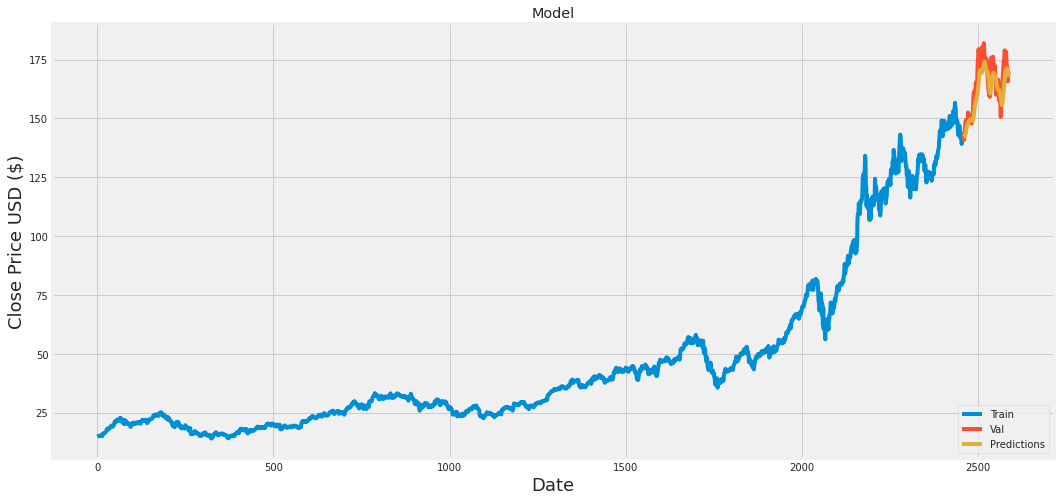

In [63]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions  # añadimos una columna al dataset test con las predicciones y así lo podemos comparar como vemos en la tabla de abajo
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()